In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import WordPunctTokenizer

# Data base import

In [2]:
from utils import sample_data

# -- Get the data -- #
NB_SAMPLES = 1000
TRAIN_SAMPLE = Path("../data/samples/sample_{}_train.csv".format(NB_SAMPLES))
VALID_SAMPLE = Path("../data/samples/sample_{}_validation.csv".format(NB_SAMPLES))
TRAIN_SAMPLE = pd.read_csv(TRAIN_SAMPLE).to_numpy()
VALID_SAMPLE = pd.read_csv(VALID_SAMPLE).to_numpy()


# -- Clean the data -- #
from utils.clean_data import clean_data
TRAIN_SAMPLE = clean_data(TRAIN_SAMPLE)
VALID_SAMPLE = clean_data(VALID_SAMPLE)

In [3]:
print(TRAIN_SAMPLE)

[['8fc8d9bd09' 'i feel really weird' 'weird' -1]
 ['7eea1e9cdf' 'Too many cocktails last night, my head hurts' 'hurts' -1]
 ['398128d145'
  'twice in a week Qantas club lounge computers broken  #flyertalk'
  'twice in a week Qantas club lounge computers broken  #flyertalk' 0]
 ...
 ['24ff960250' ' artery tomorrow. No more Hagen Daz for me'
  'artery tomorrow. No more Hagen Daz for me' 0]
 ['35b5a783cf'
  ' Here are some that other tweeple recommend to me: www.audiomicro.com , http://tr.im/gWOy , http://tr.im/gWPx'
  'Here are some that other tweeple recommend to me: www.audiomicro.com , http://tr.im/gWOy , http://tr.im/gWPx'
  0]
 ['1d1a84678c'
  'Getting ready to go to #Brighton to find myself a new suit from #GreshamBlake - Sunday = me time'
  'Getting ready to go to #Brighton to find myself a new suit from #GreshamBlake - Sunday = me time'
  0]]


# Pre-processing
#### TWEET_ORIGINALS : List of the tweets : Array, shape = (len(nb_tweets))
#### TWEET_STRINGS : List of the list of the word of each tweet : List of list of string
#### TWEET_SCALARS : List of the description of each tweet : Array, shape = (len(nb_tweets), sentence_size * word_size)
#### IMPORTANT_WORDS : List of the label of each tweet : Array, shape = (len(nb_tweets), sentence_size)

In [4]:
# -- Parameters -- #
WORD_SIZE = 50  # 50 or 100 or 200 or 300
FILL_WITH = 0  # If a word is not in the dictionary, [0, ..., 0] will describe it.
SENTIMENT_WEIGHT = 1  # Multiply the sentiment by a factor
SENTENCE_SIZE = 50  # What ever
OPTIONS = [WORD_SIZE, SENTENCE_SIZE, FILL_WITH, SENTIMENT_WEIGHT]


# -- Get the original tweets -- #
TWEET_ORIGINALS_TRAIN = TRAIN_SAMPLE[:, 1]
TWEET_ORIGINALS_VALID = VALID_SAMPLE[:, 1]
print("First tweet :")
print(TWEET_ORIGINALS_TRAIN[0])
print("Shape of TWEET_ORIGINAL :", TWEET_ORIGINALS_TRAIN.shape)

First tweet :
i feel really weird
Shape of TWEET_ORIGINAL : (966,)


In [5]:
from descriptors.tweet_string.create_strings import create_strings
from descriptors.tokenizer.tokenizer import Tokenizer

# Initialize the tokenizer
TOKENIZER = Tokenizer()

# -- Get the decomposition of the tweets -- #
TWEET_STRINGS_TRAIN = create_strings(TWEET_ORIGINALS_TRAIN, TOKENIZER, SENTENCE_SIZE)
TWEET_STRINGS_VALID = create_strings(TWEET_ORIGINALS_VALID, TOKENIZER, SENTENCE_SIZE)
print("Decomposition of the first tweet :")
print(TWEET_STRINGS_TRAIN[0])
print("Length of TWEET_STRING :", len(TWEET_STRINGS_TRAIN))


Decomposition of the first tweet :
['i', 'feel', 'really', 'weird']
Length of TWEET_STRING : 966


In [6]:
from descriptors.descriptor_glove.descriptor_glove import tweet_scalar_glove
from utils.standardize import standardize


# Get the dictionary
PATH_DICTIONARY = Path("../data/glove_descriptor/glove.6B.{}d.txt".format(WORD_SIZE))
# PATH_DICTIONARY = Path("../data/glove_descriptor/sample_test.txt")
DICTIONARY = pd.read_csv(PATH_DICTIONARY, sep=" ", header=None)

# Additional dictionary
ADDITIONAL_DIC = {"..": "...", "<3": "love"}

# Get the sentiments
SENTIMENTS_TRAIN = TRAIN_SAMPLE[:, -1]
SENTIMENTS_VALID = VALID_SAMPLE[:, -1]

# -- Get the decriptions of each tweets -- #
TWEET_SCALARS_TRAIN = tweet_scalar_glove(TWEET_STRINGS_TRAIN, SENTIMENTS_TRAIN, DICTIONARY, ADDITIONAL_DIC, OPTIONS)
TWEET_SCALARS_VALID = tweet_scalar_glove(TWEET_STRINGS_VALID, SENTIMENTS_VALID, DICTIONARY, ADDITIONAL_DIC, OPTIONS)

# Standardize the tweet descriptions
standardize(TWEET_SCALARS_TRAIN)
standardize(TWEET_SCALARS_VALID)

print("Description of the first tweet :")
print(TWEET_SCALARS_TRAIN[0])
print("Shape of TWEET_SCLALAR :", TWEET_SCALARS_TRAIN.shape)
print(TWEET_SCALARS_VALID.shape)

Description of the first tweet :
[ 0.13417587 -0.02395894 -0.21725474 ...  0.          0.
 -1.        ]
Shape of TWEET_SCLALAR : (966, 2501)
(966, 2501)


In [7]:
from descriptors.tweet_label.create_labels import create_labels

# Create the decompositions of the labels
LABEL_ORIGINALS_TRAIN = TRAIN_SAMPLE[:, 2]
LABEL_ORIGINALS_VALID = VALID_SAMPLE[:, 2]
LABEL_STRINGS_TRAIN = create_strings(LABEL_ORIGINALS_TRAIN, TOKENIZER, SENTENCE_SIZE)
LABEL_STRINGS_VALID = create_strings(LABEL_ORIGINALS_VALID, TOKENIZER, SENTENCE_SIZE)

# -- Get the labels -- #
IMPORTANT_WORDS_TRAIN = create_labels(TWEET_STRINGS_TRAIN, LABEL_STRINGS_TRAIN, SENTENCE_SIZE)
IMPORTANT_WORDS_VALID = create_labels(TWEET_STRINGS_VALID, LABEL_STRINGS_VALID, SENTENCE_SIZE)

IDX = 5
print(TWEET_ORIGINALS_TRAIN[IDX])
print(LABEL_ORIGINALS_TRAIN[IDX])
print("Labels :")
print(IMPORTANT_WORDS_TRAIN[IDX])
print("Shape of IMPORTANT_WORDS :", IMPORTANT_WORDS_TRAIN.shape)

 Can I have a splodge of ketchup on mine please?!
Can I have a splodge of ketchup on mine please?!
Labels :
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Shape of IMPORTANT_WORDS : (966, 50)


# Classification

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from utils.post_processing import preds_to_strings
from utils.loss import mean_jaccard

In [ ]:
# Try with one KNN
NB_NEIGHBORS = 1

KNN = KNeighborsRegressor(NB_NEIGHBORS, weights="distance")
KNN.fit(TWEET_SCALARS_TRAIN, IMPORTANT_WORDS_TRAIN)

In [11]:
# --- Optimize the number of neighbors --- #
# Parameter
NB_NEIGHBORS_MAX = 400
NB_NEIGHBORS_MIN = 20
STEP_NEIGH = 40
SENTIMENT_WEIGHT_MAX = 200
SENTIMENT_WEIGHT_MIN = 1
STEP_WEIGHT = 20

# Variables
NB_NEIGHBORS_OPT = 1
SENTIMENT_WEIGHT_OPT = 1
JACCARD_ACC_MAX = 0
JACCARD_LIST = []

for nb_neigh in range(NB_NEIGHBORS_MIN, NB_NEIGHBORS_MAX, STEP_NEIGH):
    for sentiment_weight in range(SENTIMENT_WEIGHT_MIN, SENTIMENT_WEIGHT_MAX, STEP_WEIGHT):
        # Modify the sentiments
        SCALARS_TRAIN = TWEET_SCALARS_TRAIN.copy()
        SCALARS_TRAIN[:, -1] *= sentiment_weight
        SCALARS_VALID = TWEET_SCALARS_VALID.copy()
        SCALARS_VALID[:, -1] *= sentiment_weight
        
        # Define the knn
        KNN = KNeighborsRegressor(nb_neigh, weights="distance")

        # Train the knn
        KNN.fit(SCALARS_TRAIN, IMPORTANT_WORDS_TRAIN)

        # Scalar predictions
        PRED_SCALAR = KNN.predict(SCALARS_VALID)

        # Get the string predictions
        PRED_STRING = preds_to_strings(TWEET_ORIGINALS_VALID, TWEET_STRINGS_VALID, PRED_SCALAR)

        # Compute the loss
        JACCARD_ACC = mean_jaccard(LABEL_ORIGINALS_VALID, PRED_STRING)

        # Print results
        print("Jaccard score", JACCARD_ACC)
        print("Sentiment weight", sentiment_weight)
        print("Number neighbors", nb_neigh)
        print("\n")
        
        # Updates
        JACCARD_LIST.append(JACCARD_ACC)
        if JACCARD_ACC > JACCARD_ACC_MAX:
            JACCARD_ACC_MAX = JACCARD_ACC
            NB_NEIGHBORS_OPT = nb_neigh    
            SENTIMENT_WEIGHT_OPT = sentiment_weight

Jaccard score 0.4267728605789235
Sentiment weight 1
Number neighbors 20


Jaccard score 0.43817548916660193
Sentiment weight 21
Number neighbors 20


Jaccard score 0.43817548916660193
Sentiment weight 41
Number neighbors 20


Jaccard score 0.43817548916660193
Sentiment weight 61
Number neighbors 20


Jaccard score 0.43817548916660193
Sentiment weight 81
Number neighbors 20


Jaccard score 0.43817548916660193
Sentiment weight 101
Number neighbors 20


Jaccard score 0.43817548916660193
Sentiment weight 121
Number neighbors 20


Jaccard score 0.43817548916660193
Sentiment weight 141
Number neighbors 20


Jaccard score 0.43817548916660193
Sentiment weight 161
Number neighbors 20


Jaccard score 0.43817548916660193
Sentiment weight 181
Number neighbors 20


Jaccard score 0.4648584396206064
Sentiment weight 1
Number neighbors 60


Jaccard score 0.48679423791012366
Sentiment weight 21
Number neighbors 60


Jaccard score 0.4868188854502991
Sentiment weight 41
Number neighbors 60


Jaccard scor

The optimal number of neighbors to take is : 340
The optimal sentiment weight is : 161
With this parameters, the Jaccard accuracy is : 0.5728025168417792


<IPython.core.display.Javascript object>


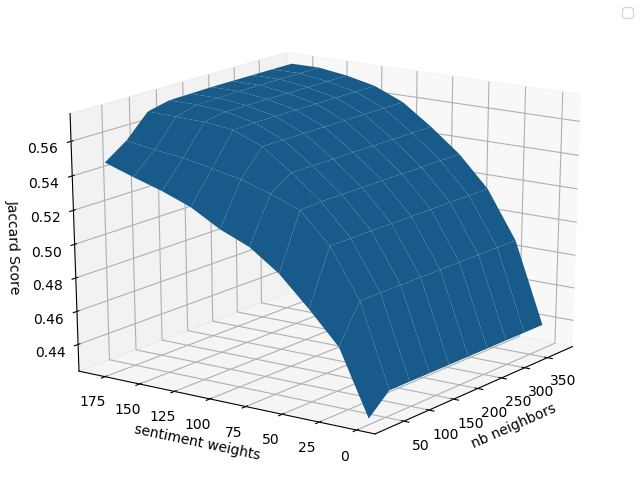

No handles with labels found to put in legend.


In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# Plot the results
PATH_SAVE = Path("../results")

print("The optimal number of neighbors to take is :", NB_NEIGHBORS_OPT)
print("The optimal sentiment weight is :", SENTIMENT_WEIGHT_OPT)
print("With this parameters, the Jaccard accuracy is :", JACCARD_ACC_MAX)

# Create the grid and the axes
LIST_NEIGHBORS = np.arange(NB_NEIGHBORS_MIN, NB_NEIGHBORS_MAX, STEP_NEIGH)
LIST_WEIGHTS = np.arange(SENTIMENT_WEIGHT_MIN, SENTIMENT_WEIGHT_MAX, STEP_WEIGHT)
(NEIGHBORS, WEIGHTS) = np.meshgrid(LIST_NEIGHBORS, LIST_WEIGHTS)
ax = Axes3D(plt.figure())

# Show the plots
ax.plot_surface(NEIGHBORS, WEIGHTS, np.reshape(JACCARD_LIST, (len(LIST_NEIGHBORS), -1)))
ax.set_xlabel('nb neighbors')
ax.set_ylabel('sentiment weights')
ax.set_zlabel('Jaccard Score')
plt.legend()
plt.savefig(PATH_SAVE / "glove_knn_train_{}_neighbors_{}_sentiment_{}.jpg".format(NB_SAMPLES, NB_NEIGHBORS_MAX, SENTIMENT_WEIGHT_MAX))
plt.show()

In [ ]:
PRED_SCALAR = KNN.predict(TWEET_SCALARS_VALID)
print("Nomber of correct match", np.sum(PREDICTIONS == IMPORTANT_WORDS_VALID))
print("Number of match to make", len(PREDICTIONS) * len(PREDICTIONS[0]))

In [ ]:
PRED_STRING = preds_to_strings(TWEET_ORIGINALS_VALID, TWEET_STRINGS_VALID, PRED_SCALAR)

In [ ]:
SHOW_RESULT = False
if SHOW_RESULT:
    for idx_tweet in range(len(RESULTS)):
        print(TWEET_ORIGINALS_VALID[idx_tweet])
        print(IMPORTANT_WORDS_VALID[idx_tweet])
        print(PRED_SCALAR[idx_tweet])
        print(PRED_STRING[idx_tweet], "\n")

In [ ]:
from utils.loss import mean_jaccard

JACCARD_ACC = mean_jaccard(LABEL_ORIGINALS_VALID, PRED_STRING)
print(JACCARD_ACC)